In [35]:
import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
trials_data= pd.read_csv('trials_training_data.csv')

In [38]:
trials_data

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,base_lr,epochs,...,loss/train,loss/val,lr,precip_val_loss,temp_val_loss,tmax_val_loss,tmin_val_loss,total_val_loss,trial,weights
0,trial_2,finished,-,NaN,NaN,2025-07-19T21:54:03.000Z,17124,NaN,0.0001,20.0,...,0.000063,0.000059,0.0010,NaN,NaN,NaN,NaN,NaN,2,NaN
1,trial_0,finished,-,NaN,NaN,2025-07-20T10:31:40.000Z,17670,NaN,NaN,NaN,...,0.000057,0.000054,0.0008,0.000004,0.000056,0.000084,0.000098,0.000054,0,"[0.2886978837916178,0.3378427925582116,0.16448..."
2,trial_10,finished,-,NaN,NaN,2025-07-21T04:27:06.000Z,7075,NaN,NaN,NaN,...,0.000057,0.000060,0.0008,0.000004,0.000077,0.000094,0.000080,0.000057,24,"[0.33606969326889924,0.13119827552117166,0.336..."
3,trial_11,finished,-,NaN,NaN,2025-07-21T02:28:13.000Z,7129,NaN,NaN,NaN,...,0.000063,0.000059,0.0010,0.000004,0.000063,0.000093,0.000090,0.000059,21,"[0.26937599450155403,0.30615865716140617,0.252..."
4,trial_3,finished,-,NaN,NaN,2025-07-20T15:36:19.000Z,7301,NaN,NaN,NaN,...,0.000057,0.000062,0.0010,0.000005,0.000066,0.000114,0.000103,0.000059,4,"[0.36503006197686494,0.2575344108920214,0.2530..."
5,trial_14,finished,-,NaN,NaN,2025-07-21T10:22:04.000Z,7038,NaN,NaN,NaN,...,0.000053,0.000054,0.0008,0.000005,0.000065,0.000101,0.000091,0.000052,31,"[0.39917137031543554,0.23347669290918308,0.232..."
6,trial_5,finished,-,NaN,NaN,2025-07-20T17:38:06.000Z,7075,NaN,NaN,NaN,...,0.000058,0.000051,0.0008,0.000005,0.000058,0.000072,0.000087,0.000051,8,"[0.3118304899680882,0.2532597408016314,0.20394..."
7,trial_4,finished,The runtime is less because the run was initia...,NaN,NaN,2025-07-19T16:53:35.000Z,6,NaN,0.0001,20.0,...,0.000053,0.000058,0.0008,NaN,NaN,NaN,NaN,NaN,2,NaN
8,trial_12,finished,-,NaN,NaN,2025-07-21T06:25:03.000Z,7198,NaN,NaN,NaN,...,0.000059,0.000058,0.0008,0.000005,0.000080,0.000083,0.000096,0.000058,26,"[0.35386864319746436,0.11439642812908588,0.277..."
9,trial_9,finished,-,NaN,NaN,2025-07-21T00:30:15.000Z,7076,NaN,NaN,NaN,...,0.000061,0.000058,0.0008,0.000005,0.000064,0.000094,0.000081,0.000058,19,"[0.27267314701417944,0.26208159763191047,0.303..."


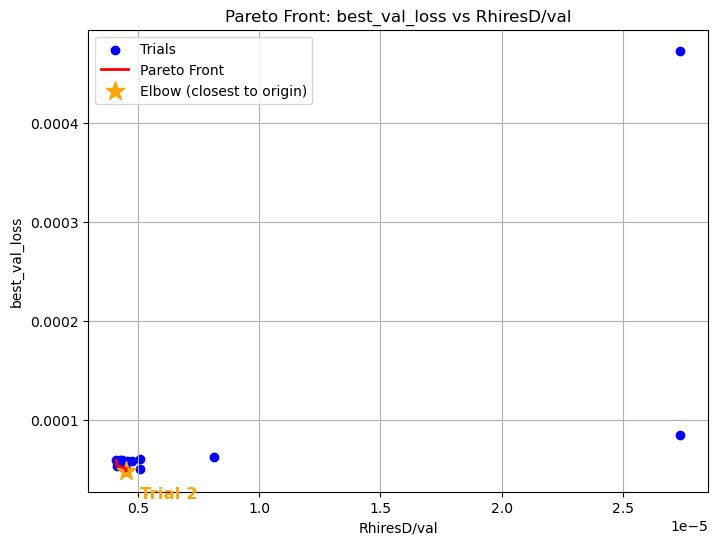

In [ ]:
x = trials_data['RhiresD/val'].values
y = trials_data['best_val_loss'].values

def pareto_front_2d(x, y):
    points = np.array(list(zip(x, y)))
    pareto_idx = []
    for i, p in enumerate(points):
        if not np.any((points[:,0] < p[0]) & (points[:,1] < p[1])):
            pareto_idx.append(i)
    pareto_points = points[pareto_idx]
    pareto_idx = np.array(pareto_idx)
    # Sort for plotting
    sort_idx = np.argsort(pareto_points[:,0])
    pareto_points = pareto_points[sort_idx]
    pareto_idx = pareto_idx[sort_idx]
    return pareto_points, pareto_idx

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Trials', color='blue')
plt.plot(pareto_points[:,0], pareto_points[:,1], color='red', linewidth=2, label='Pareto Front')

# Find Pareto point closest to origin
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_num = trials_data.loc[elbow_trial_idx, 'trial']

plt.scatter(elbow_x, elbow_y, marker='*', s=200, color='orange', label='Elbow')
plt.annotate(f'Trial {elbow_trial_num}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='orange', fontsize=12, fontweight='bold')

plt.xlabel('RhiresD/val')
plt.ylabel('best_val_loss')
plt.title('Pareto Front: best_val_loss vs RhiresD/val')
plt.legend()
plt.grid(True)